In [2]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)
x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [6]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [7]:
x_Train4D.shape

(60000, 28, 28, 1)

In [8]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [9]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [11]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [56]:
# 建立模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [57]:
# 透過Sequential method建構模型
# "Sequential Model (順序式模型)是一種簡單的模型，單一輸入、單一輸出，按順序一層(Dense)一層的由上往下執行。"
model = Sequential()

In [58]:
# 利用add method將layer加入模型中
# 加入一層卷積層,filter為16, Kernel size為(5,5),Padding為(same)會保留邊界處的卷積結果確保shape不會變小.輸出不會變少
# 並設定input的維度和激活函數為(relu)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [59]:
# 利用add method加入池化層
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [60]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [61]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [62]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.5))

In [63]:
# 做全連接層前做平坦化，將特徵值轉為一維資料以供後續的全連結層使用
model.add(Flatten())

In [64]:
# "全連接層(Dense)，它所實現的運算就是 output = activation(dot(input, kernel) + bias)，即 y = g(x * W + b)。"
# 建立全連結層中的隱藏層(即傳統神經網路中的全連結層)。
# Dense(128)是指有128個 hidden units，神經元數目為128個，會有128個輸出變數(output arrays of shape (*, 128))，並使用relu:[0,∞] 
model.add(Dense(128, activation='relu')) 

model.add(Dropout(0.5))

# 設定輸出的空間維度(尺寸)為10，並使用softmax:[0,1] 
model.add(Dense(10,activation='softmax'))

In [65]:
# print出模型的概述
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               225920    
__________

In [66]:
# "以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)。"
# Cross Entropy (categorical_crossentropy)：當預測值與實際值愈相近，損失函數就愈小，反之差距很大，就會更影響損失函數的值。
# Adam：一般而言，比隨機梯度下降法模型訓練成本較低。
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [67]:
# 使用fit指令做擬合、開始訓練CNN模型
# 設定X.Y後，Validation_split設定分配作為驗證資料(test)的比例為0.2，所以60000筆的Train資料被分成training 48000筆、testing 12000筆
# epochs=10 代表要執行10次訓練
# batch_size=300 每個訓練週期會將所有資料以每批次300筆來執行(所以每個訓練週期會執行48000/300=160批次，每批次為300筆data)
# 每訓練完一個週期，會計算此週期的accuracy與loss放到train_history變數中。
# verbose=2 為設定顯示模式，2代表每輪一行
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 36s - loss: 0.5375 - acc: 0.8295 - val_loss: 0.0968 - val_acc: 0.9703
Epoch 2/10
 - 35s - loss: 0.1530 - acc: 0.9526 - val_loss: 0.0654 - val_acc: 0.9799
Epoch 3/10
 - 35s - loss: 0.1110 - acc: 0.9663 - val_loss: 0.0537 - val_acc: 0.9833
Epoch 4/10
 - 36s - loss: 0.0910 - acc: 0.9730 - val_loss: 0.0460 - val_acc: 0.9866
Epoch 5/10
 - 36s - loss: 0.0788 - acc: 0.9754 - val_loss: 0.0379 - val_acc: 0.9885
Epoch 6/10
 - 36s - loss: 0.0712 - acc: 0.9789 - val_loss: 0.0365 - val_acc: 0.9897
Epoch 7/10
 - 36s - loss: 0.0650 - acc: 0.9799 - val_loss: 0.0340 - val_acc: 0.9900
Epoch 8/10
 - 36s - loss: 0.0594 - acc: 0.9817 - val_loss: 0.0323 - val_acc: 0.9913
Epoch 9/10
 - 37s - loss: 0.0557 - acc: 0.9826 - val_loss: 0.0312 - val_acc: 0.9911
Epoch 10/10
 - 37s - loss: 0.0502 - acc: 0.9850 - val_loss: 0.0296 - val_acc: 0.9903


In [68]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

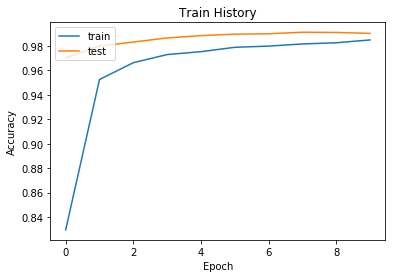

In [69]:
show_train_history('acc','val_acc')

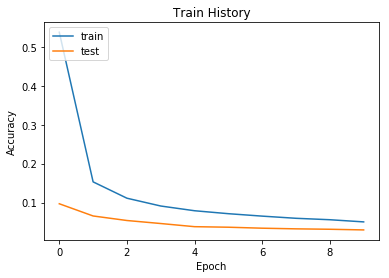

In [70]:
show_train_history('loss','val_loss')